In [27]:
# Standard Libraries
import os
import dotenv as dv
# Data Analysis, Visualization and Machine Learning Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly as ply
import plotly.express as px
import seaborn as sns
import sklearn as skl
# import tensorflow as tf # Framework for building and training ML models. PyTorch is another alternative.
import yfinance as yf
import requests

# Overview of Economic Indicators
Time series analysis of published data from NZ Stats across business, census, economy, environment, health, industries, labour market and population indicators. Compare against Aotearoa New Zealand's key trading partners (USA, China, Australia, Japan, UK, Eurozone).
1. Gross Domestic Product (GDP)
2. Consumer Price Index (CPI)
3. Interest Rates (OCR & Yields)
4. Unemployment Rate, Jobless Claims, and Under Utilization Rate
5. Trade Balances

## Data Preprocessing
Define filepaths for initializing and processessing datasets.

In [6]:
# Business
# Census
# Economy
gdp_fp = '../../data/raw/nz_stats/economy/gross-domestic-product-march-2025-quarter.csv'
# Environment
# Government Finance (Central, Local, Combined)
# Health
# Industries
# Labour Market
# Population
# Society

## Gross Domestic Product (GDP)
Preprocess and visualise GDP from multiple measures:
### Key Aggregates
- **Real GDP (Chain Volume):** 'Series, Key aggregates, Chain volume, Actual, Total'
- **Nominal GDP (Nominal):** 'Series, Key aggregates, Nominal, Actual, Total'
### Production Approach (GDP(P))
1. Real GDP - Total value of Goods Produced (Chain Volume): 'Series, GDP(P), Chain volume, Actual, Total'
### Expenditure Approach (GDP(E))
- Real GDP - Total value of Expenditure (Chain Volume): 'Series, GDP(E), Chain volume, Actual, Total'
- Nominal GDP - Total value of expenditure (Nominal): 'GDP(E), Nominal, Actual, Total'
### Income Approach (GDP(I))
1. GDP(I) adjusted for Inflation - Income generated by production (Nominal): 'GDP(I), current prices'

In [12]:
# Inspect GDP dataframe
gdp_df = pd.read_csv(gdp_fp)

Index(['Series_reference', 'Period', 'Data_value', 'STATUS', 'UNITS',
       'MAGNITUDE', 'Subject', 'Group', 'Series_title_1', 'Series_title_2',
       'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95326 entries, 0 to 95325
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  95326 non-null  object 
 1   Period            95326 non-null  float64
 2   Data_value        93182 non-null  float64
 3   STATUS            95326 non-null  object 
 4   UNITS             95326 non-null  object 
 5   MAGNITUDE         95326 non-null  int64  
 6   Subject           95326 non-null  object 
 7   Group             95326 non-null  object 
 8   Series_title_1    95326 non-null  object 
 9   Series_title_2    80788 non-null  object 
 10  Series_title_3    17804 non-null  object 
 11  Series_title_4    0 non-null      float64
 12

In [26]:
# Key Groupings
gdp_key_agg_real = 'Series, Key aggregates, Chain volume, Actual, Total'
gdp_key_agg_nominal = 'Series, Key aggregates, Nominal, Actual, Total'
gdp_p_nominal = 'GDP(P), Nominal, Actual, Total'
gdp_p_real = 'Series, GDP(P), Chain volume, Actual, Total'
gdp_e_nominal = 'Series, GDP(E), Nominal, Actual, Total'
gdp_e_real = 'Series, GDP(E), Chain volume, Actual, Total'
gdp_i_nominal = 'Series, GDP(I), current prices'
key_groupings = [gdp_key_agg_real, gdp_key_agg_nominal, gdp_p_nominal, gdp_p_real, gdp_e_nominal, gdp_e_real, gdp_i_nominal]

# Determine string columns
str_cols = gdp_df.select_dtypes(include=['object']).columns
num_cols = gdp_df.select_dtypes(include=['float64', 'int64']).columns

# Display unique values in the string columns.
for col in str_cols:
    print(f"Unique values in {col}: {gdp_df[col].nunique()}")
    print(gdp_df[col].unique())

# Process GDP Dataframe; write to processed data folder.
def process_gdp(df: pd.DataFrame) -> pd.DataFrame:
    """
    Process GDP dataframe for analysis.
    :param raw df:
    :return: processed DataFrame
    """
    # Drop unnecessary columns
    df = df.drop(columns=['Series_title_4','Series_title_5'])
    # Filter for the key groupings
    df = df[df['Group'].isin(key_groupings)]
    # Rename columns for clarity
    df = df.rename(columns={'Period': 'period', 'Data_value': 'value', 'STATUS': 'status'})
    # Convert period to timestamp e.g., 1980.03 to datetime
    df['year'] = df['period'].astype(str).str.split('.').str[0].astype(int)
    df['month'] = df['period'].astype(str).str.split('.').str[1].astype(int)
    date_df = df[['year', 'month']]
    df['date'] = pd.to_datetime(date_df.assign(day=1))
    # Partitions

    return df

gdp_processed_df = process_gdp(gdp_df)
print(gdp_processed_df.head())

# List unique columns to g
# Determine string columns
str_cols = gdp_processed_df.select_dtypes(include=['object']).columns
num_cols = gdp_processed_df.select_dtypes(include=['float64', 'int64']).columns

# Display unique values in the string columns.
for col in str_cols:
    print(f"Unique values in {col}: {gdp_processed_df[col].nunique()}")
    print(gdp_processed_df[col].unique())

# Save processed GDP Data
gdp_processed_df.to_csv('../../data/processed/nz_stats/gdp.csv')

Unique values in Series_reference: 1004
['SNEA.SG00NAC00B15' 'SNEA.SG00NAC00B15D' 'SNEA.SG00NAC00B15J' ...
 'SNEQ.SG09RSC00B01NZ' 'SNEQ.SG09RSC00B06NZ' 'SNEQ.SG09RSC00B15NZ']
Unique values in STATUS: 3
['FINAL' 'REVISED' 'CONFIDENTIAL']
Unique values in UNITS: 3
['Dollars' 'Index' 'Percent']
Unique values in Subject: 1
['National Accounts - SNA 2008 - SNE']
Unique values in Group: 82
['Series, Key aggregates, Nominal, Actual, Total'
 'Series, Rolling Annuals, Key aggregates, Nominal, Actual, Total'
 'Series, Key aggregates, Chain volume, Actual, Total'
 'Series, Rolling Annuals, Key aggregates, Chain volume, Actual, Total'
 'Series, GDP(P), Chain volume, Actual, Total'
 'Series, GDP(P), Chain volume, Actual, HOTP industry groups'
 'Series, Rolling Annuals, Chain volume, Actual, HOTP industry'
 'Series, GDP(P), Chain volume, Actual, ANZSIC06 high-level industry groups'
 'Series, GDP(P), Chain volume, Actual, ANZSIC06 industry groups'
 'Series, GDP(E), Nominal, Actual, Total'
 'Series, G

<class 'pandas.core.frame.DataFrame'>
Index: 5264 entries, 0 to 86781
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Series_reference  5264 non-null   object        
 1   period            5264 non-null   float64       
 2   value             5264 non-null   float64       
 3   status            5264 non-null   object        
 4   UNITS             5264 non-null   object        
 5   MAGNITUDE         5264 non-null   int64         
 6   Subject           5264 non-null   object        
 7   Group             5264 non-null   object        
 8   Series_title_1    5264 non-null   object        
 9   Series_title_2    3198 non-null   object        
 10  Series_title_3    2016 non-null   object        
 11  year              5264 non-null   int64         
 12  month             5264 non-null   int64         
 13  date              5264 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float6

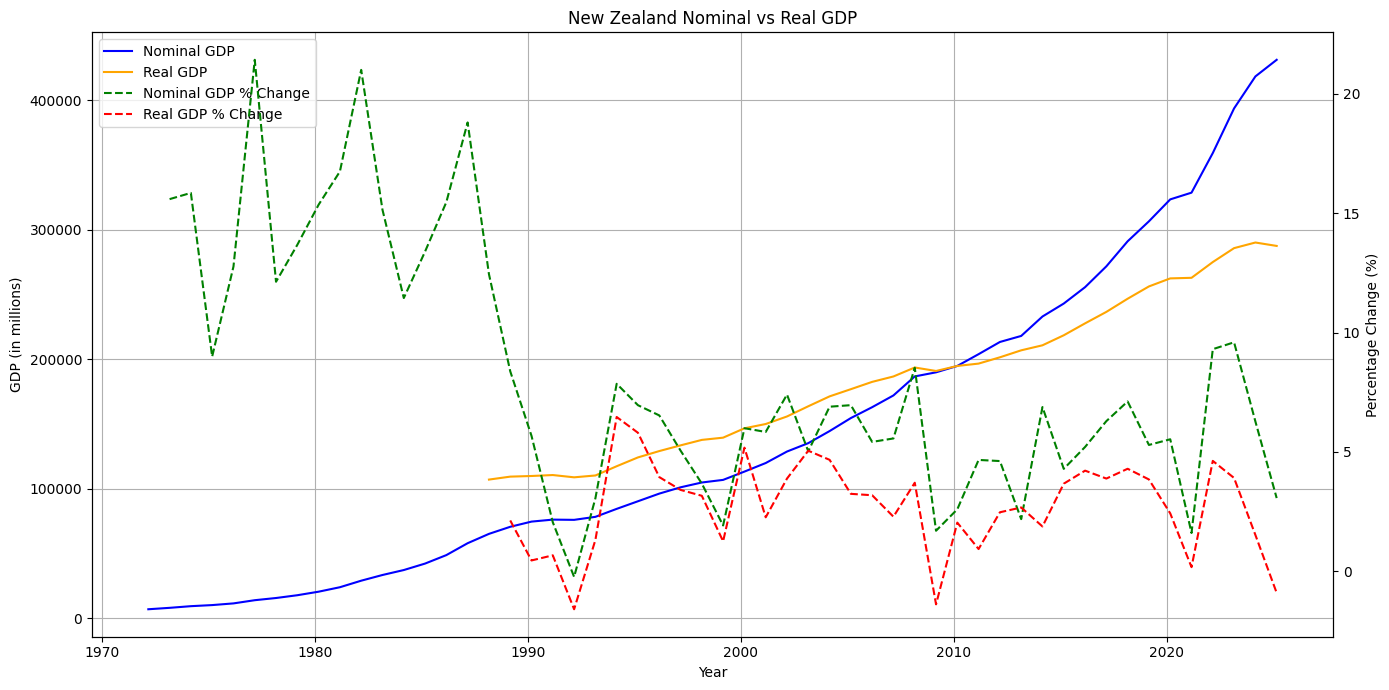

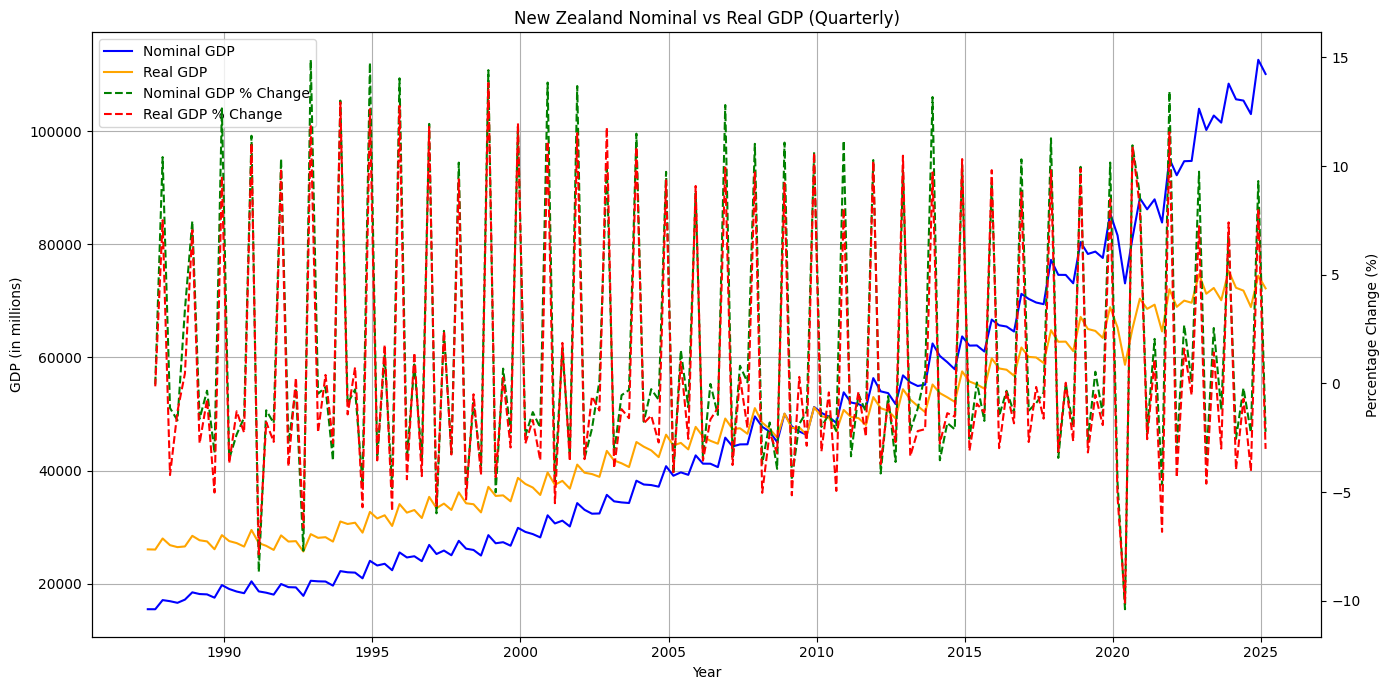

In [38]:
# Model the GDP Data in a series of charts.
gdp_processed_df.info()
# Nominal GDP (Nominal): 'Series, Key aggregates, Nominal, Actual, Total'
gdp_nom_df = gdp_processed_df[gdp_processed_df['Group'].isin(['Series, Key aggregates, Nominal, Actual, Total'])]
gdp_nom_df = gdp_nom_df[gdp_nom_df['Series_title_1'] == 'Gross Domestic Product - expenditure measure']
max_ind = min(max(gdp_nom_df.index),100) # Trick to separate maximum and minimum data.
gdp_nom_annual_df = gdp_nom_df.loc[:max_ind].copy()
gdp_nom_annual_df['pct_change'] = gdp_nom_annual_df['value'].pct_change() * 100
gdp_nom_annual_df.to_csv('../../data/processed/nz_stats/gdp_nom_annual.csv')
# Quarterly Calculations
gdp_nom_quarterly_df = gdp_nom_df.loc[max_ind+1:].copy()
gdp_nom_quarterly_df['pct_change'] = gdp_nom_quarterly_df['value'].pct_change() * 100
gdp_nom_quarterly_df.to_csv('../../data/processed/nz_stats/gdp_nom_quarterly.csv')

# Real GDP (Chain Volume): 'Series, Key aggregates, Chain volume, Actual, Total'
gdp_real_df = gdp_processed_df[gdp_processed_df['Group'].isin(['Series, Key aggregates, Chain volume, Actual, Total'])]
gdp_real_df = gdp_real_df[gdp_real_df['Series_title_1'] == 'Gross Domestic Product - expenditure measure']
max_ind = min(max(gdp_real_df.index),1000) # Trick to separate maximum and minimum data.
gdp_real_annual_df = gdp_real_df.loc[:max_ind].copy()
gdp_real_annual_df['pct_change'] = gdp_real_annual_df['value'].pct_change() * 100
gdp_real_annual_df.to_csv('../../data/processed/nz_stats/gdp_real_annual.csv')
# Quarterly Calculations
gdp_real_quarterly_df = gdp_real_df.loc[max_ind+1:].copy()
gdp_real_quarterly_df['pct_change'] = gdp_real_quarterly_df['value'].pct_change() * 100
gdp_real_quarterly_df.to_csv('../../data/processed/nz_stats/gdp_real_quarterly.csv')

# Plot the Annual Figures.
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(gdp_nom_annual_df['date'], gdp_nom_annual_df['value'], label='Nominal GDP', color='blue')
ax1.plot(gdp_real_annual_df['date'], gdp_real_annual_df['value'], label='Real GDP', color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (in millions)')
ax1.tick_params(axis='y')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(gdp_nom_annual_df['date'], gdp_nom_annual_df['pct_change'], label='Nominal GDP % Change', color='green', linestyle='--')
ax2.plot(gdp_real_annual_df['date'], gdp_real_annual_df['pct_change'], label='Real GDP % Change', color='red', linestyle='--')
ax2.set_ylabel('Percentage Change (%)')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('New Zealand Nominal vs Real GDP')
fig.tight_layout()  # Adjusts plot to prevent labels from overlapping
plt.show()

# Plot the Quarterly Figures on a separate graph.
fig_quart, ax3 = plt.subplots(figsize=(14, 7))
ax3.plot(gdp_nom_quarterly_df['date'], gdp_nom_quarterly_df['value'], label='Nominal GDP', color='blue')
ax3.plot(gdp_real_quarterly_df['date'], gdp_real_quarterly_df['value'], label='Real GDP', color='orange')
ax3.set_xlabel('Year')
ax3.set_ylabel('GDP (in millions)')
ax3.tick_params(axis='y')
ax3.grid(True)

ax4 = ax3.twinx()
ax4.plot(gdp_nom_quarterly_df['date'], gdp_nom_quarterly_df['pct_change'], label='Nominal GDP % Change', color='green', linestyle='--')
ax4.plot(gdp_real_quarterly_df['date'], gdp_real_quarterly_df['pct_change'], label='Real GDP % Change', color='red', linestyle='--')
ax4.set_ylabel('Percentage Change (%)')
ax4.tick_params(axis='y')
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, loc='upper left')
plt.title('New Zealand Nominal vs Real GDP (Quarterly)')
fig_quart.tight_layout()  # Adjusts plot to prevent labels from overlapping
plt.show()


Graph shows nominal and real gross domestic product (GDP) in New Zealand from 1980 to 2025. Also shows percentage change in GDP for both meassures.

## Consumer Price Index (CPI)

In [54]:
# Load all the datasets in the existing
bop_quarterly_df = pd.read_csv('../../data/raw/nz_stats/economy/balance-of-payments-and-international-investment-position-march-2025-quarter.csv')
cpi_quarterly_df = pd.read_csv('../../data/raw/nz_stats/economy/consumers-price-index-june-2025-quarter-index-numbers.csv')
cpi_quarterly_sa_df = pd.read_csv('../../data/raw/nz_stats/economy/consumers-price-index-june-2025-quarter-seasonally-adjusted.csv')
cpi_quarterly_trade_df = pd.read_csv('../../data/raw/nz_stats/economy/consumers-price-index-june-2025-quarter-tradeables-and-non-tradeables.csv')
gdp_quarterly_df = pd.read_csv('../../data/raw/nz_stats/economy/gross-domestic-product-march-2025-quarter.csv')
hlci_df = pd.read_csv('../../data/raw/nz_stats/economy/household-living-costs-price-indexes-december-2024-quarter-time-series-indexes.csv')
na_quarterly_consolidated_df = pd.read_csv('../../data/raw/nz_stats/economy/na-isal-march-2025-quarter-consolidated-accounts.csv')
na_quarterly_institutional_df = pd.read_csv('../../data/raw/nz_stats/economy/na-isal-march-2025-quarter-institutional-sector-accounts.csv')
productivity_df = pd.read_csv('../../data/raw/nz_stats/economy/productivity-statistics-1978-2024.csv')
sel_ind_df = pd.read_csv('../../data/raw/nz_stats/economy/selected-price-indexes-july-2025.csv')

In [55]:
# Process and model seasonally adjusted CPI data
def process_cpi_sa(df: pd.DataFrame) -> pd.DataFrame:
    """
    Process CPI seasonally adjusted dataframe for analysis.
    :param raw df:
    :return: processed DataFrame
    """
    # Rename columns for clarity
    df = df.rename(columns={'Period': 'period', 'Data_value': 'value', 'STATUS': 'status'})
    # Convert period to timestamp e.g., 1980.03 to datetime
    df['year'] = df['period'].astype(str).str.split('.').str[0].astype(int)
    df['month'] = df['period'].astype(str).str.split('.').str[1].astype(int)
    date_df = df[['year', 'month']]
    df['date'] = pd.to_datetime(date_df.assign(day=1))
    return df

# Print unique values in the groups.
unique_groups = cpi_quarterly_sa_df['Group'].unique()

# Loop through the groups and print the unique values each group.
for group in unique_groups:
    group_df = cpi_quarterly_sa_df[cpi_quarterly_sa_df['Group'] == group]
    unique_series_1 = group_df['Series_title_1'].unique()
    unique_series_2 = group_df['Series_title_2'].unique()
    print(f"Group: {group}")
    print(f"Series 1: {unique_series_1}")
    print(f"Series 2: {unique_series_2}")
    print("\n")

Group: CPI Level 1 Groups for New Zealand, Seasonally adjusted
Series 1: ['Seasonally adjusted']
Series 2: ['Food' 'Alcoholic beverages and tobacco' 'Clothing and footwear'
 'Housing and household utilities' 'Household contents and services'
 'Health' 'Transport' 'Communication' 'Recreation and culture' 'Education'
 'Miscellaneous goods and services']


Group: CPI Level 2 Subgroups for New Zealand, Seasonally adjusted
Series 1: ['Seasonally adjusted']
Series 2: ['Fruit and vegetables' 'Meat, poultry and fish' 'Grocery food'
 'Non-alcoholic beverages' 'Restaurant meals and ready-to-eat food'
 'Alcoholic beverages' 'Cigarettes and tobacco' 'Clothing' 'Footwear'
 'Actual rentals for housing' 'Home ownership' 'Property maintenance'
 'Property rates and related services' 'Household energy'
 'Furniture, furnishings and floor coverings' 'Household textiles'
 'Household appliances' 'Glassware, tableware and household utensils'
 'Tools and equipment for house and garden'
 'Other household suppl

# Identified a range of possible values for national data.
Assess the impact of seasonally adjusted CPI data on aggregates

1. 'CPI All Groups for New Zealand, Seasonally adjusted'
2. 'CPI Non-standard Tradable & Non-tradable series,Seasonally adjusted' - 'Tradable All Groups' vs 'Non-Tradable All Groups'

Note: Python enables to programmatically analyse different combinations of inflation data to place specific bets depending on the outcomes.

  Series_reference   period  value   status  UNITS Subject  \
0      CPIQ.SE9S01  2006.06  762.0  REVISED  Index     CPI   
1      CPIQ.SE9S01  2006.09  771.0  REVISED  Index     CPI   
2      CPIQ.SE9S01  2006.12  780.0  REVISED  Index     CPI   
3      CPIQ.SE9S01  2007.03  788.0  REVISED  Index     CPI   
4      CPIQ.SE9S01  2007.06  794.0  REVISED  Index     CPI   

                                               Group       Series_title_1  \
0  CPI Level 1 Groups for New Zealand, Seasonally...  Seasonally adjusted   
1  CPI Level 1 Groups for New Zealand, Seasonally...  Seasonally adjusted   
2  CPI Level 1 Groups for New Zealand, Seasonally...  Seasonally adjusted   
3  CPI Level 1 Groups for New Zealand, Seasonally...  Seasonally adjusted   
4  CPI Level 1 Groups for New Zealand, Seasonally...  Seasonally adjusted   

  Series_title_2  year  month       date  
0           Food  2006      6 2006-06-01  
1           Food  2006      9 2006-09-01  
2           Food  2006     12 2006-

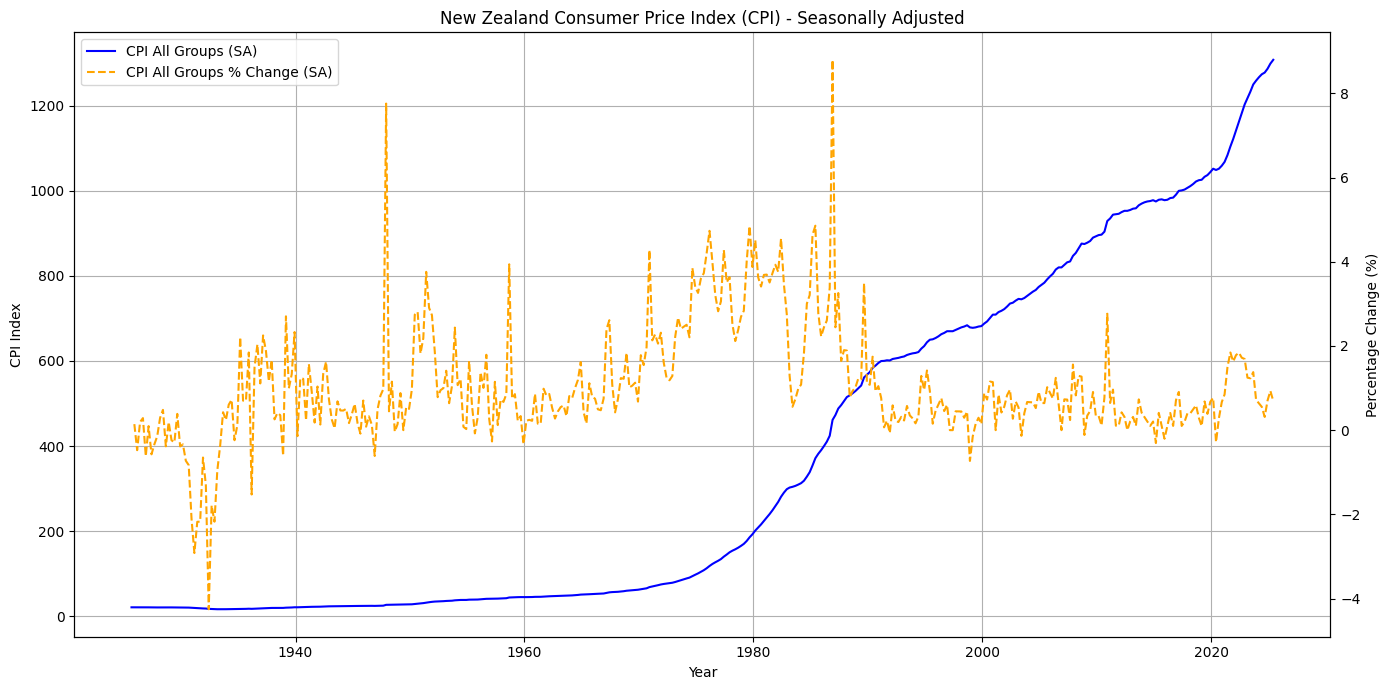

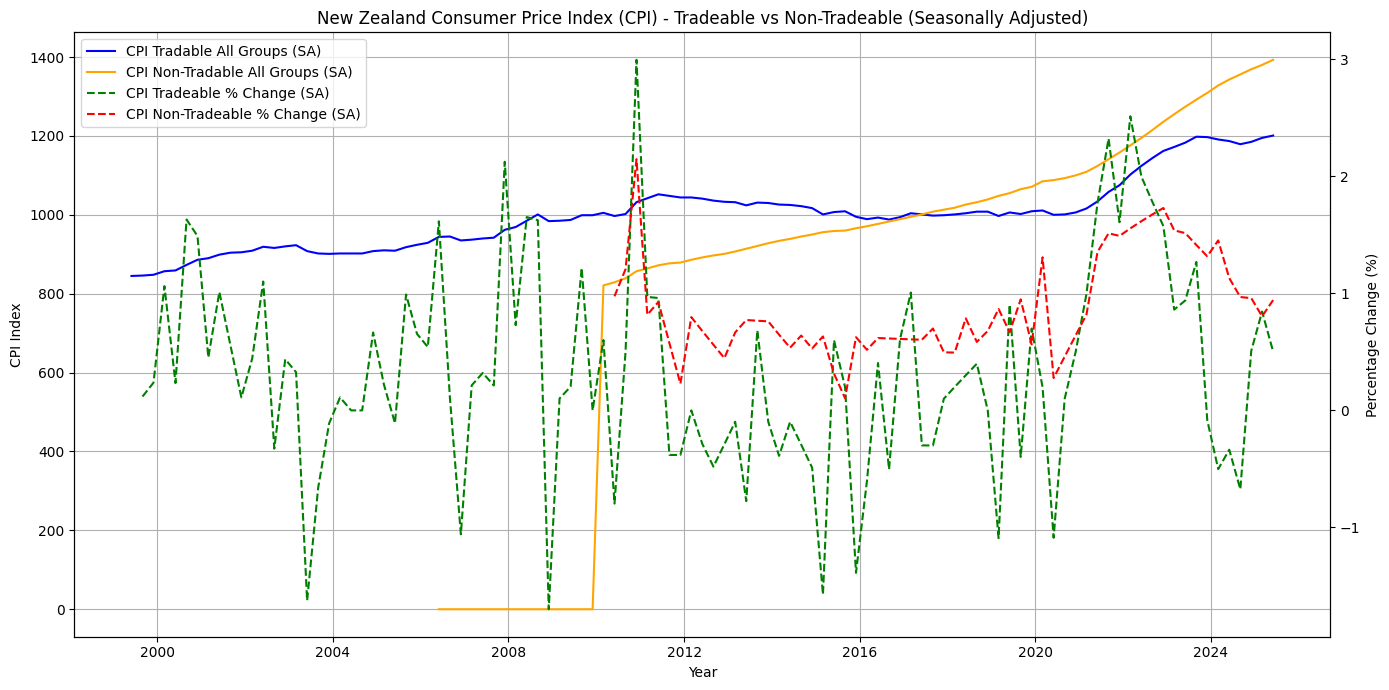

In [58]:
# Use the processing function to clean the CPI seasonally adjusted dataframe.
cpi_sa_processed_df = process_cpi_sa(cpi_quarterly_sa_df)
print(cpi_sa_processed_df.head())
# Split the dataframe into three separate groups.
cpi_sa_nz_df = cpi_sa_processed_df[cpi_sa_processed_df['Group'] == 'CPI All Groups for New Zealand, Seasonally adjusted']
print(cpi_sa_nz_df.head())

cpi_sa_tradeable_df = cpi_sa_processed_df[cpi_sa_processed_df['Group'] == 'CPI Non-standard Tradable & Non-tradable series,Seasonally adjusted']
cpi_sa_tradeable_df = cpi_sa_tradeable_df[cpi_sa_tradeable_df['Series_title_2'] == 'Tradable All Groups']
print(cpi_sa_tradeable_df.head())


cpi_sa_non_tradeable_df = cpi_sa_processed_df[cpi_sa_processed_df['Group'] == 'CPI Non-standard Tradable & Non-tradable series,Seasonally adjusted']
cpi_sa_non_tradeable_df = cpi_sa_non_tradeable_df[cpi_sa_non_tradeable_df['Series_title_2'] == 'Non-Tradable All Groups']
print(cpi_sa_non_tradeable_df.head())

# Plot the three CPI seasonally adjusted groups.
# Figure 1: CPI All Groups for New Zealand, Seasonally adjusted
fig_cpi_sa, ax = plt.subplots(figsize=(14, 7))
ax.plot(cpi_sa_nz_df['date'], cpi_sa_nz_df['value'], label='CPI All Groups (SA)', color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('CPI Index')
ax.tick_params(axis='y')
ax.grid(True)
ax2 = ax.twinx()
ax2.plot(cpi_sa_nz_df['date'], cpi_sa_nz_df['value'].pct_change() * 100, label='CPI All Groups % Change (SA)', color='orange', linestyle='--')
ax2.set_ylabel('Percentage Change (%)')
ax2.tick_params(axis='y')
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title('New Zealand Consumer Price Index (CPI) - Seasonally Adjusted')
fig_cpi_sa.tight_layout()  # Adjusts plot to prevent labels from overlapping
plt.show()

# Plot Tradeables vs Non-Tradebales
fig_trade_nontrade, ax = plt.subplots(figsize=(14, 7))
ax.plot(cpi_sa_tradeable_df['date'], cpi_sa_tradeable_df['value'], label='CPI Tradable All Groups (SA)', color='blue')
ax.plot(cpi_sa_non_tradeable_df['date'], cpi_sa_non_tradeable_df['value'], label='CPI Non-Tradable All Groups (SA)', color='orange')
ax.set_xlabel('Year')
ax.set_ylabel('CPI Index')
ax.tick_params(axis='y')
ax.grid(True)
ax2 = ax.twinx()
ax2.plot(cpi_sa_tradeable_df['date'], cpi_sa_tradeable_df['value'].pct_change() * 100, label='CPI Tradeable % Change (SA)', color='green', linestyle='--')
ax2.plot(cpi_sa_non_tradeable_df['date'], cpi_sa_non_tradeable_df['value'].pct_change() * 100, label='CPI Non-Tradeable % Change (SA)', color='red', linestyle='--')
ax2.set_ylabel('Percentage Change (%)')
ax2.tick_params(axis='y')
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title('New Zealand Consumer Price Index (CPI) - Tradeable vs Non-Tradeable (Seasonally Adjusted)')
fig_trade_nontrade.tight_layout()  # Adjusts plot to prevent labels from overlapping
plt.show()

# Interest Rates
Models Federal reserve interest rates against currencies.
First, look at New Zealand's Key Trading Partners (USA, CHINA, AUSTRALIA, JAPAN, UK, EUROZONE)
Use Federal Reserve Economic Data (FRED) for US Data
    -

In [67]:
# Define FRED Series IDs for key economic indicators.
gnpc = 'GNPCA' # Gross National Product
effr = 'EFFR' # Effective Federal Funds Rate
eftr = 'EFTR' # Effective Federal Funds Target Rat

# US Treasury Bond Yields
treasury_yields = {
    '1 Month': 'DGS1MO',
    '3 Month': 'DGS3MO',
    '6 Month': 'DGS6MO',
    '1 Year': 'DGS1',
    '2 Year': 'DGS2',
    '3 Year': 'DGS3',
    '5 Year': 'DGS5',
    '7 Year': 'DGS7',
    '10 Year': 'DGS10',
    '20 Year': 'DGS20',
    '30 Year': 'DGS30'
}

# Spot Exchange Rates (Daily)
# Real-time transaction systems will likely have the bid-ask spreads running.
spot_exchange_rates = {
    'USD/NZD' : 'DEXUSNZ', # US Dollar to New Zealand Dollar
    'USD/AUD' : 'DEXUSAL', # US Dollar to Australian Dollar
    'BRL/USD' : 'DEXBZUS', # Brazilian Real to US Dollar (BRL/USD)
    'CAD/USD' : 'DEXCAUS', # Canadian Dollar to US Dollar
    'CYN/USD' : 'DEXCHUS', # Chinese Yuan Renminbi to US Dollar
    'DKK/USD' : 'DEXDNUS', # Danish Krone to US Dollar
    'EUR/USD' : 'DEXUSEU', # Euro to US Dollar
    'HKD/USD' : 'DEXHKUS', # Hong Kong Dollar to US Dollar
    'INR/USD' : 'DEXINUS', # Indian Rupee to US Dollar
    'JPY/USD' : 'DEXJPUS', # Japanese Yen to US Dollar
    'MYR/USD' : 'DEXMAUS', # Malaysian Ringgit to US Dollar
    'MXN/USD' : 'DEXMXUS', # Mexican Peso to US Dollar
    'NOK/USD' : 'DEXNOUS', # Norwegian Krone to US Dollar
    'SGD/USD' : 'DEXSIUS', # Singapore Dollar to US Dollar
    'SAR/USD' : 'DEXSFUS', # South African Rand to US Dollar
    'KRW/USD' : 'DEXKOUS', # South Korean Won to US Dollar
    'LKR/USD' : 'DEXSLUS', # Sri Lankan Rupee to US Dollar
    'SEK/USD' : 'DEXSDUS', # Swedish Krona to US Dollar
    'CHF/USD' : 'DEXSZUS', # Swiss Franc to US Dollar
    'TWD/USD' : 'DEXTAUS', # Taiwan Dollar to US Dollar
    'USD/GBP' : 'DEXUSUK', # US Dollar to British Pound Sterling
    'VEF/USD' : 'DEXVZUS' # Venezuelan Bolivar to US Dollar
}

In [68]:
# Use requests library to fetch data from FRED API.
def fetch_fred_data(category: str, series_id: str, api_key: str, start_date: str = '2000-01-01', end_date: str = '2025-12-31'):
    """
    Fetch data from FRED API for a given series ID.
    :param category: Category of the economic indicator
    :param series_id: FRED series ID
    :param api_key: FRED API key
    :param start_date: Start date for data retrieval
    :param end_date: End date for data retrieval
    :return: DataFrame with date and value columns
    """
    url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}'
    response = requests.get(url)
    data = response.json()
    # Save data to a JSON file for reference
    with open(f'../../data/raw/{category}/{series_id}.json', 'w') as f:
        import json
        json.dump(data, f, indent=4)
    f.close()
    return

# Initialize
dv.load_dotenv('../../.env')
fred_api_key = os.getenv('FRED_API_KEY')

# Loop through the spot exchange rates to fetch  their data
cat = 'exchange_rates'
for currency, series_id in spot_exchange_rates.items():
    try:
        fetch_fred_data(cat, series_id, fred_api_key)
    except Exception as e:
        print(f"Error fetching data for {series_id}: {e}")

# Trade Balances including indices for major importers.
GDI Index: Diary

In [24]:
# Visualise trading balances across
# Import relevant trade balances.
trade_output_df = pd.read_csv('../../data/raw/nz_stats/business/international-trade-march-2025-quarter/output_csv_full.csv')
country_codes_df = pd.read_csv('../../data/raw/nz_stats/business/international-trade-march-2025-quarter/country_classification.csv')
goods_lvl_2_df = pd.read_csv('../../data/raw/nz_stats/business/international-trade-march-2025-quarter/goods_classification.csv')
goods_lvl_1_df = pd.read_csv('../../data/raw/nz_stats/business/international-trade-march-2025-quarter/goods_classification.csv')
services_df = pd.read_csv('../../data/raw/nz_stats/business/international-trade-march-2025-quarter/services_classification.csv')


In [25]:
# Rename relevant code columns for merging and delete other column.
goods_lvl_1_df = goods_lvl_1_df.rename(columns={'NZHSC_Level_1_Code_HS2':'code'})
goods_lvl_1_df = goods_lvl_1_df.drop(columns=['NZHSC_Level_2_Code_HS4'])
goods_lvl_2_df = goods_lvl_2_df.rename(columns={'NZHSC_Level_2_Code_HS4':'code'})
goods_lvl_2_df = goods_lvl_2_df.rename(columns={'NZHSC_Level_1_Code_HS2':'group'})

# Convert the timeref column (202503) to a datetime format.
trade_output_df['year'] = trade_output_df['time_ref'].astype(str).str[:4].astype(int)
trade_output_df['month'] = trade_output_df['time_ref'].astype(str).str[4:6].astype(int)
date_df = trade_output_df[['year', 'month']]
trade_output_df['date'] = pd.to_datetime(date_df.assign(day=1))

# Join the classifications to the main output dataframe
trade_goods_df = trade_output_df[trade_output_df['product_type'] == 'Goods']
trade_services_df = trade_output_df[trade_output_df['product_type'] == 'Services']

# Create a dataframe which is just goods and services.
total_goods_df = trade_goods_df[trade_goods_df['code'] == '00']
total_goods_df = total_goods_df.merge(country_codes_df, on='country_code', how='left')
total_goods_df.to_csv('../../data/processed/nz_stats/trade/total_trade_goods.csv')

# Covert the goods codes to numeric for easier filtering.
trade_goods_df.loc[:, 'code'] = pd.to_numeric(trade_goods_df['code'], errors='coerce')
trade_goods_lvl_1 = trade_goods_df[trade_goods_df['code'] < 100]
trade_goods_lvl_2 = trade_goods_df[trade_goods_df['code'] >=100]

# Merge the country codes, goods and services classifications to the main trade output dataframe.
# Goods Level 1
goods_lvl_1_total = trade_goods_lvl_1.merge(country_codes_df, on='country_code', how='left')
goods_lvl_1_total = goods_lvl_1_total.merge(goods_lvl_1_df, on='code', how='left')
goods_lvl_1_total.to_csv('../../data/processed/nz_stats/trade/trade_goods_lvl_1.csv')
# Goods Level 2
goods_lvl_2_total = trade_goods_lvl_2.merge(country_codes_df, on='country_code', how='left')
goods_lvl_2_total = goods_lvl_2_total.merge(goods_lvl_2_df, on='code', how='left')
goods_lvl_2_total.to_csv('../../data/processed/nz_stats/trade/trade_goods_lvl_2.csv')
# Services
services_total = trade_services_df.merge(country_codes_df, on='country_code', how='left')
services_total = services_total.merge(services_df, on='code', how='left')
services_total.to_csv('../../data/processed/nz_stats/trade/trade_services.csv')


In [29]:
# Visualise the trade balances for each of New Zealand's Major Trading Partners (China, Australia, USA, Japan, UK, Eurozone, South Korea)
processed_goods_lvl_1_df = pd.read_csv('../../data/processed/nz_stats/trade/trade_goods_lvl_1.csv')
processed_goods_lvl_2_df = pd.read_csv('../../data/processed/nz_stats/trade/trade_goods_lvl_2.csv')
processed_services_df = pd.read_csv('../../data/processed/nz_stats/trade/trade_services.csv')
processed_total_goods_df = pd.read_csv('../../data/processed/nz_stats/trade/total_trade_goods.csv')


In [39]:
# Create a tree maps for
quarter = '202503' # YYYYMM
processed_total_goods_df = processed_total_goods_df[processed_total_goods_df['time_ref'] == int(quarter)]
processed_total_goods_df.to_csv('../../data/processed/nz_stats/trade/total_trade_qtr.csv')
total_exports = processed_total_goods_df[processed_total_goods_df['account'] == 'Exports']
total_imports = processed_total_goods_df[processed_total_goods_df['account'] == 'Imports']

# Print the sum of total exports and imports to verify data integrity.
print(f"Total Exports: {total_exports['value'].sum()}")
print(f"Total Imports: {total_imports['value'].sum()}")

# Crate a tree map here.
try:
    fig_tot_exp = px.treemap(
        total_exports,
        path=['country_label'],
        values='value',
        title='Total Aotearoa Exports ($, Goods) by Country'
    )
    # Update the trace to display the values inside the blocks
    fig_tot_exp.update_traces(
        textinfo="label+value+percent parent"
    )
    fig_tot_exp.show()
except ValueError as ve:
    print(f"ValueError: {ve}")
    print("Check if the 'value' column contains non-numeric data.")
    print(total_exports['value'].head())

Total Exports: 20080810665.0
Total Imports: 18499832174.0


In [38]:
# Create tree maps from major trading partners.
# Crate a tree map here.
try:
    fig_tot_imp = px.treemap(
        total_imports,
        path=['country_label'],
        values='value',
        title='Total Aotearoa New Zealand Imports ($, Goods) by Country'
    )
    # Update the trace to display the values inside the blocks
    fig_tot_imp.update_traces(
        textinfo="label+value+percent parent"
    )
    fig_tot_imp.show()
except ValueError as ve:
    print(f"ValueError: {ve}")
    print("Check if the 'value' column contains non-numeric data.")
    print(total_imports['value'].head())

In [34]:
# Create a tree maps
major_trading_partners = ['CN','US','AU','JP','KP','SG'] # 50% Total Exports.
trade_partners_df = processed_goods_lvl_2_df[processed_goods_lvl_2_df['country_code'].isin(major_trading_partners)] # Filter for major trading partners.
trade_partners_df = trade_partners_df[trade_partners_df['time_ref'] == int(quarter)] # Filter for the latest quarter.
trade_partners_df.to_csv('../../data/processed/nz_stats/trade/trade_partners_qtr.csv') # Save the filtered dataframe.
trade_partners_exports = trade_partners_df[trade_partners_df['account'] == 'Exports'] # Filter for specific imports.
trade_partners_imports = trade_partners_df[trade_partners_df['account'] == 'Imports'] # Filter for specific imports.

In [46]:
# Create a tree map for major trading partner and their exports.
try:
    fig_tot_exp_lvl_1 = px.treemap(
        trade_partners_exports,
        path=['country_label', 'NZHSC_Level_1'],
        values='value',
        title='Total Aotearoa New Zealand Exports ($, Goods, NZHSC Level 1) to Top Trading Partners (China, USA, Australia, Japan, South Korea, Singapore)'
    )
    # Update the trace to display the values inside the blocks
    fig_tot_exp_lvl_1.update_traces(
        textinfo="label+value+percent parent"
    )
    fig_tot_exp_lvl_1.show()
except ValueError as ve:
    print(f"ValueError: {ve}")
    print("Check if the 'value' column contains non-numeric data.")
    print(total_exports['value'].head())

try:
    fig_tot_exp_lvl_2 = px.treemap(
        trade_partners_exports,
        path=['country_label', 'NZHSC_Level_2'],
        values='value',
        title='Total Aotearoa New Zealand Exports ($, Goods, NZHSC Level 2) to Top Trading Partners (China, USA, Australia, Japan, South Korea, Singapore)'
    )
    # Update the trace to display the values inside the blocks
    fig_tot_exp_lvl_2.update_traces(
        textinfo="label+value+percent parent"
    )
    fig_tot_exp_lvl_2.show()
except ValueError as ve:
    print(f"ValueError: {ve}")
    print("Check if the 'value' column contains non-numeric data.")
    print(total_exports['value'].head())

In [45]:
# Create Tree Maps for Import Data
# Create a tree maps for major trading partner and their exports.
# Crate a tree map here.
try:
    fig_tot_imp_lvl_1 = px.treemap(
        trade_partners_imports,
        path=['country_label', 'NZHSC_Level_1'],
        values='value',
        title='Total Aotearoa New Zealand Imports ($, Goods, NZHSC Level 1) from Top Trading Partners (China, USA, Australia, Japan, South Korea, Singapore)'
    )
    # Update the trace to display the values inside the blocks
    fig_tot_imp_lvl_1.update_traces(
        textinfo="label+value+percent parent"
    )
    fig_tot_imp_lvl_1.show()
except ValueError as ve:
    print(f"ValueError: {ve}")
    print("Check if the 'value' column contains non-numeric data.")
    print(total_exports['value'].head())

try:
    fig_tot_imp_lvl_2 = px.treemap(
        trade_partners_imports,
        path=['country_label', 'NZHSC_Level_2'],
        values='value',
        title='Total Aotearoa New Zealand Imports ($, Goods, NZHSC Level 2) from Top Trading Partners (China, USA, Australia, Japan, South Korea, Singapore)'
    )
    # Update the trace to display the values inside the blocks
    fig_tot_imp_lvl_2.update_traces(
        textinfo="label+value+percent parent"
    )
    fig_tot_imp_lvl_2.show()
except ValueError as ve:
    print(f"ValueError: {ve}")
    print("Check if the 'value' column contains non-numeric data.")
    print(total_exports['value'].head())

In [ ]:
# Create Tree Maps for Import Data
